In [117]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.linalg import solve

In [118]:
def lorenz_eq(t, w, s, r, b):
    """
    Outputs ODEs for the behaviour of the Earth's atmosphere at (X, Y, Z).
    
    inputs: t ------- float, time, required for solve_ivp
            w ------- array, current values, [X, Y, Z]
            s ------- float, the Prandtl number
            r ------- float, the Rayleigh number
            b ------- float, dimensionless length scale
            
    outputs: dW ----- array, [dXdt, dYdt, dZdt]
    
    """
    
    X, Y, Z = w
    
    dXdt = -s * (X - Y)
    dYdt = (r * X) - Y - (X * Z)
    dZdt = -(b * Z) + (X * Y)
    
    dW = [dXdt, dYdt, dZdt]
    
    return dW

In [119]:
# set the initial conditions
w0 = [0., 1., 0.]
t_span = [0.0,60]

# set parameter values for  s, r, b
args = (10., 28, 8./3.)

# evaluation values for t (6000 steps because Lorenz performed 6000 iterations)
t = np.linspace(t_span[0], t_span[1], 6000)

# integrate the equation
sol = solve_ivp(fun=lorenz_eq,y0=w0,t_span=t_span,args=args,t_eval=t)

print(sol)

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.000e-02 ...  5.999e+01  6.000e+01]
        y: [[ 0.000e+00  9.514e-02 ...  9.837e-02  1.480e-01]
            [ 1.000e+00  1.004e+00 ...  6.168e-01  6.242e-01]
            [ 0.000e+00  4.792e-04 ...  1.726e+01  1.680e+01]]
      sol: None
 t_events: None
 y_events: None
     nfev: 5762
     njev: 0
      nlu: 0


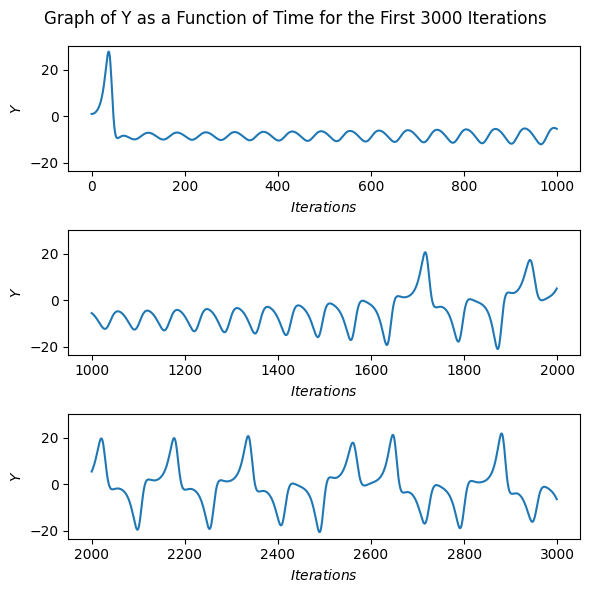

In [124]:
# y values are the second row of sol
Y = sol.y[1]
time = sol.t

# plotting in 3 subplots (each 1000 steps)
f,ax = plt.subplots(3, 1, figsize=(6, 6), sharey=True)

for i in range(3):
    start = i * 1000
    end = (i + 1) * 1000
    step_range = np.arange(start, end) 
    ax[i].plot(step_range, Y[start:end])
    ax[i].set_xlabel("$Iterations$")
    ax[i].set_ylabel("$Y$")

f.suptitle("Graph of Y as a Function of Time for the First 3000 Iterations")
plt.tight_layout()
plt.show()

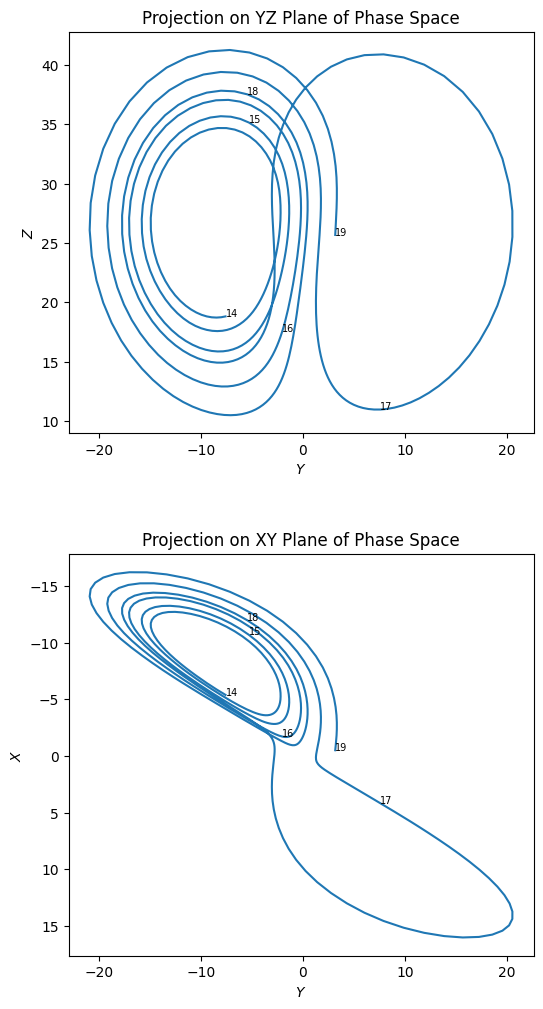

In [125]:
# getting data for iterations 1400-1900
X_segment = sol.y[0][1400:1901]
Y_segment = sol.y[1][1400:1901]
Z_segment = sol.y[2][1400:1901]

f, ax = plt.subplots(2, 1, figsize=(6, 12))

# plot YZ plane projection
ax[0].plot(Y_segment, Z_segment)
ax[0].set_xlabel("$Y$")
ax[0].set_ylabel("$Z$")
ax[0].set_title("Projection on YZ Plane of Phase Space")

# plot XY plane projection
ax[1].plot(Y_segment, X_segment)  # x and y flipped as shown in Fig. 2
ax[1].invert_yaxis()  # x axis positive downward as shown in Fig. 2
ax[1].set_xlabel("$Y$")
ax[1].set_ylabel("$X$")
ax[1].set_title("Projection on XY Plane of Phase Space")

# add labels
for iteration in range(1400, 1901, 100):
    label = iteration - 1400
    ax[0].text(Y_segment[label], Z_segment[label], str(iteration // 100), fontsize=7)
    ax[1].text(Y_segment[label], X_segment[label], str(iteration // 100), fontsize=7)

plt.subplots_adjust(hspace=0.3)

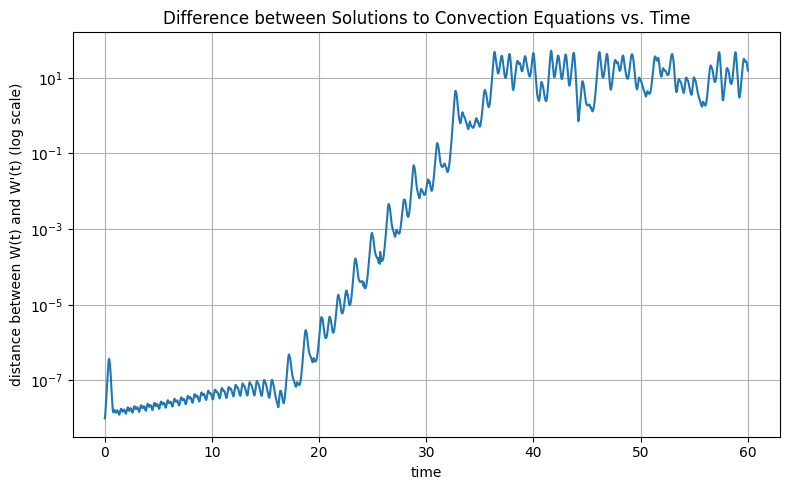

In [122]:
# slightly modified initial conditions
w0_prime = [w0[i] + diff for i, diff in enumerate([0., 1.e-8, 0.])]

# integrate the ode, all other values shared with W0 and as such already defined
sol_prime = solve_ivp(fun=lorenz_eq,y0=v0,t_span=t_span,args=args,t_eval=t)

distance = np.linalg.norm(sol_prime.y - sol.y, axis = 0)

plt.figure(figsize=(8, 5))
plt.semilogy(sol.t, distance)
plt.xlabel("time")
plt.ylabel("distance between W(t) and W'(t) (log scale)")
plt.title("Difference between Solutions to Convection Equations vs. Time")
plt.grid(True)
plt.tight_layout()
plt.show()